In [41]:
#bibliotecas
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
 #dataset
 data = pd.read_csv('E:\Projetos\ML_algoritmos\diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.shape

(768, 9)

In [13]:
#checando valores nulos
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

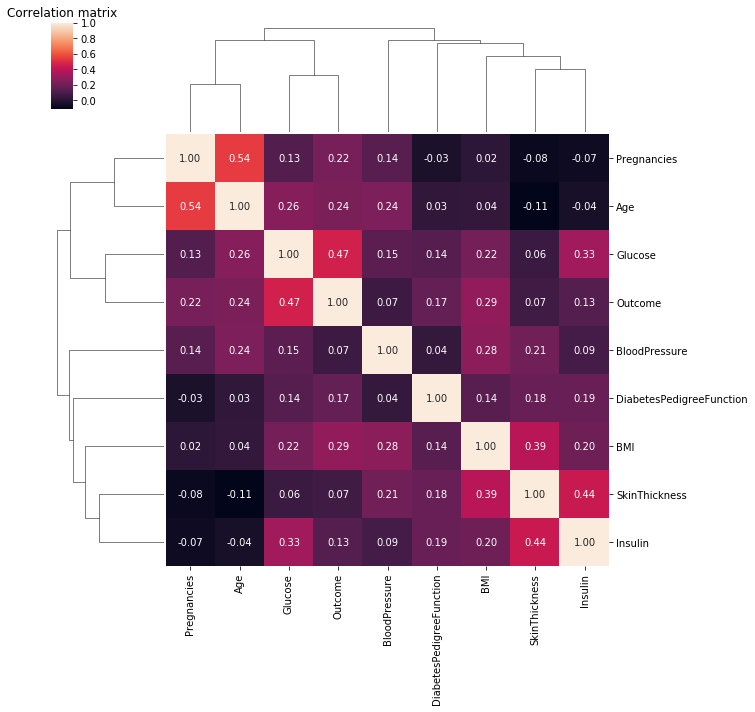

In [43]:
corr = data.corr()
plot = sns.clustermap(corr, annot = True, fmt = '.2f')
plt.title('Correlation matrix')
plt.show()

In [38]:
#percentual de diabeticos
percent = 100 * sum(data['Outcome'] == 1) / data.shape[0]
percent

34.895833333333336

In [40]:
data.info() #temos 7 vars int, 2 vars float, todas sem valores nulos, já está pronto para os algoritmos de ML

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
x = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [57]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x,y,test_size= 0.3, random_state = 666)

(231,)

In [63]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [79]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [125]:
#fit predict
lr.fit(x_train,y_train)
lr_predictions = lr.predict(x_test)

In [115]:
#k-fold CV
from sklearn.model_selection import cross_val_score
acc = cross_val_score(lr,x_train,y_train,cv=10)
print(acc)
print(np.mean(acc))
print(np.std(acc))

[0.74545455 0.8        0.83636364 0.7037037  0.77358491 0.73584906
 0.83018868 0.62264151 0.77358491 0.75471698]
0.7576087923257735
0.05960633585915675


In [126]:
#LR score
lr_score = lr.score(x_test,y_test)
lr_score

0.7922077922077922

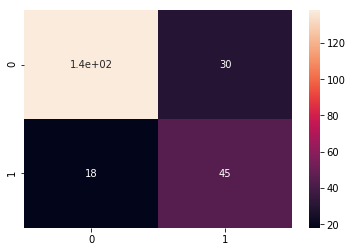

In [138]:
#confusion matrix para logistic regression
from sklearn.metrics import confusion_matrix
CM_lr = confusion_matrix(lr_predictions, y_test)
sns.heatmap(CM_lr, annot=True)

In [142]:
#SVM
from sklearn.svm import SVC
svc = SVC(random_state=0)

In [143]:
svc.fit(x_train,y_train)
svc_predictions = svc.predict(x_test)

array([[138,  34],
       [ 18,  41]], dtype=int64)

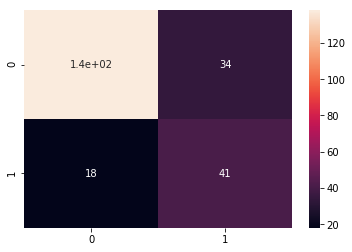

In [144]:
CM_svc = confusion_matrix(svc_predictions, y_test)
sns.heatmap(CM_svc, annot=True)
CM_svc